# **<font color=white> 데이터 분석 맛보기 과정 실습**

[목차]
  1. Google Colab Setting
  2. Data Loading
    - URL to Colab
    - Drive to Colab
  3. Linear Regression
    - 단순 Linear Regression을 활용하여 변수의 중요도 및 방향성을 알아봄
    - 매우 심플한 모델이기 때문에 사이즈가 큰 데이터에 적합하지 않음
    - 하지만 설명력에서는 큰 장점이 있음
  4. Decision Tree
    - 매우 심플한 모델이기 때문에 사이즈가 큰 데이터에 적합하지 않음
    - 하지만 설명력에서는 큰 장점이 있음
  
[Process]
  1. Define X's & Y
  2. Split Train & Valid dataset
  3. Modeling
  4. Model 해석

In [1]:
# 정형데이터 다루는 Package 
import pandas as pd

In [39]:
# Data Loading (URL to Colab)
data = pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/TOY_DATA.csv")

In [4]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive/')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/01.한국정보기술원_230520/")
os.getcwd()

Mounted at /content/drive/


'/content/drive/MyDrive/Colab Notebooks/01.한국정보기술원_230520'

In [5]:
data = pd.read_csv("TOY_Data.csv")

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, mean_squared_error, r2_score, mean_absolute_error

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

In [7]:
X = data[['X1', 'X2', 'X3']]
Y = data['Y']

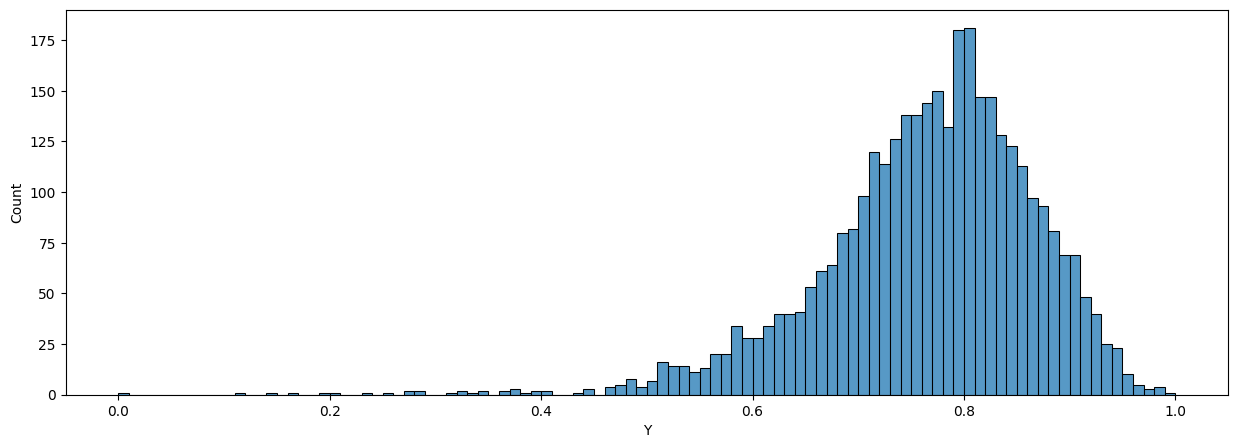

In [11]:
plt.figure(figsize=(15,5))
sns.histplot(data['Y'], bins=100)
plt.show()

In [12]:
# Data Split
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=2023)
print(">>>> # of Train data : {}".format(len(train_idx)))
print(">>>> # of valid data : {}".format(len(valid_idx)))

>>>> # of Train data : 2450
>>>> # of valid data : 1050


# **<font color=white> Linear Regression**

In [13]:
#add constant to predictor variables
X = sm.add_constant(X)

In [14]:
# Linear Regression 구축
model = sm.OLS(Y.iloc[train_idx], X.iloc[train_idx])
model_trained = model.fit()

In [15]:
#view model summary
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.675e+07
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        11:51:13   Log-Likelihood:                 15220.
No. Observations:                2450   AIC:                        -3.043e+04
Df Residuals:                    2446   BIC:                        -3.041e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.7717      0.005  -9065.160      0.0

In [16]:
# Prediction
y_test_pred = model_trained.predict(X.iloc[valid_idx])

In [18]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(Y.iloc[valid_idx], y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(Y.iloc[valid_idx], y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(Y.iloc[valid_idx], y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(Y.iloc[valid_idx], y_test_pred)))

Testing MSE: 0.000
Testing RMSE: 0.000
Testing MAE: 0.000
Testing R2: 1.000


In [22]:
X = data[['X1', 'X2', 'X3']]
Y = data['Y']

In [23]:
# Scaling
scaler = MinMaxScaler().fit(X.iloc[train_idx])
X_scal = scaler.transform(X)
X_scal = pd.DataFrame(X_scal, columns=X.columns)

In [25]:
#add constant to predictor variables
X_scal = sm.add_constant(X_scal)

In [26]:
# Linear Regression 구축
model = sm.OLS(Y.iloc[train_idx], X_scal.iloc[train_idx])
model_trained = model.fit()

In [27]:
#view model summary
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.675e+07
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        11:56:35   Log-Likelihood:                 15220.
No. Observations:                2450   AIC:                        -3.043e+04
Df Residuals:                    2446   BIC:                        -3.041e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5844      0.000  -4044.855      0.0

In [29]:
# Prediction
y_test_pred = model_trained.predict(X_scal.iloc[valid_idx])

In [30]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(Y.iloc[valid_idx], y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(Y.iloc[valid_idx], y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(Y.iloc[valid_idx], y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(Y.iloc[valid_idx], y_test_pred)))

Testing MSE: 0.000
Testing RMSE: 0.000
Testing MAE: 0.000
Testing R2: 1.000


# **<font color=white> Decision Tree**

In [34]:
# Problem Convert
# Regression to Classifcation
# 상위 30% (Class 1)과 하위 30% (Class 0)
per_70 = np.percentile(data['Y'], 70)
per_30 = np.percentile(data['Y'], 30)
print(">>>> 70 Percentile : {}".format(per_70))
print(">>>> 30 Percentile : {}".format(per_30))

>>>> 70 Percentile : 0.821760391
>>>> 30 Percentile : 0.7269621028


In [40]:
data = data[(data['Y'] >= per_70) | (data['Y'] <= per_30)]

In [41]:
# Assign Class
data['Label'] = 3
data['Label'].iloc[np.where(data['Y'] >= per_70)[0]] = 1
data['Label'].iloc[np.where(data['Y'] <= per_30)[0]] = 0
print("Unique Label : {}".format(set(data['Label']))) 

Unique Label : {0, 1}


In [42]:
X = data[['X1', 'X2', 'X3']]
Y = data['Label']

In [44]:
# Data Split
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=2023)
print(">>>> # of Train data : {}".format(len(train_idx)))
print(">>>> # of valid data : {}".format(len(valid_idx)))

>>>> # of Train data : 1470
>>>> # of valid data : 631


In [45]:
# Depth 조절 Decision Tree
for i in range(2,11,1):
    print(">>>> Depth {}".format(i))

    model = DecisionTreeClassifier(max_depth=i, criterion='gini')
    model.fit(X.iloc[train_idx], Y.iloc[train_idx])

    # Train Acc
    y_pre_train = model.predict(X.iloc[train_idx])
    cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
    print("Train Confusion Matrix")
    print(cm_train)
    print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
    print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

    # Test Acc
    y_pre_test = model.predict(X.iloc[valid_idx])
    cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
    print("Train Confusion Matrix")
    print(cm_test)
    print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
    print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))
    print("-----------------------------------------------------------------------")
    print("-----------------------------------------------------------------------")

>>>> Depth 2
Train Confusion Matrix
[[711  23]
 [ 46 690]]
Train Acc : 0.9530612244897959
Train F1-Score : 0.9523809523809523
Train Confusion Matrix
[[305  11]
 [ 19 296]]
TesT Acc : 0.9524564183835182
Test F1-Score : 0.9517684887459807
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>>> Depth 3
Train Confusion Matrix
[[712  22]
 [ 23 713]]
Train Acc : 0.9693877551020408
Train F1-Score : 0.9694085656016315
Train Confusion Matrix
[[302  14]
 [ 12 303]]
TesT Acc : 0.9587955625990491
Test F1-Score : 0.958860759493671
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>>> Depth 4
Train Confusion Matrix
[[714  20]
 [ 17 719]]
Train Acc : 0.9748299319727891
Train F1-Score : 0.9749152542372881
Train Confusion Matrix
[[304  12]
 [  8 307]]
TesT Acc : 0.9683042789223455
Test F1-Score : 0.968454258675079
---

In [46]:
# Depth가 깊어질 수록 정확도는 높게 나오지만 해석력에 대한 가독성을 위해 Depth 4를 선택함
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
model.fit(X.iloc[train_idx], Y.iloc[train_idx])

DecisionTreeClassifier(max_depth=4)

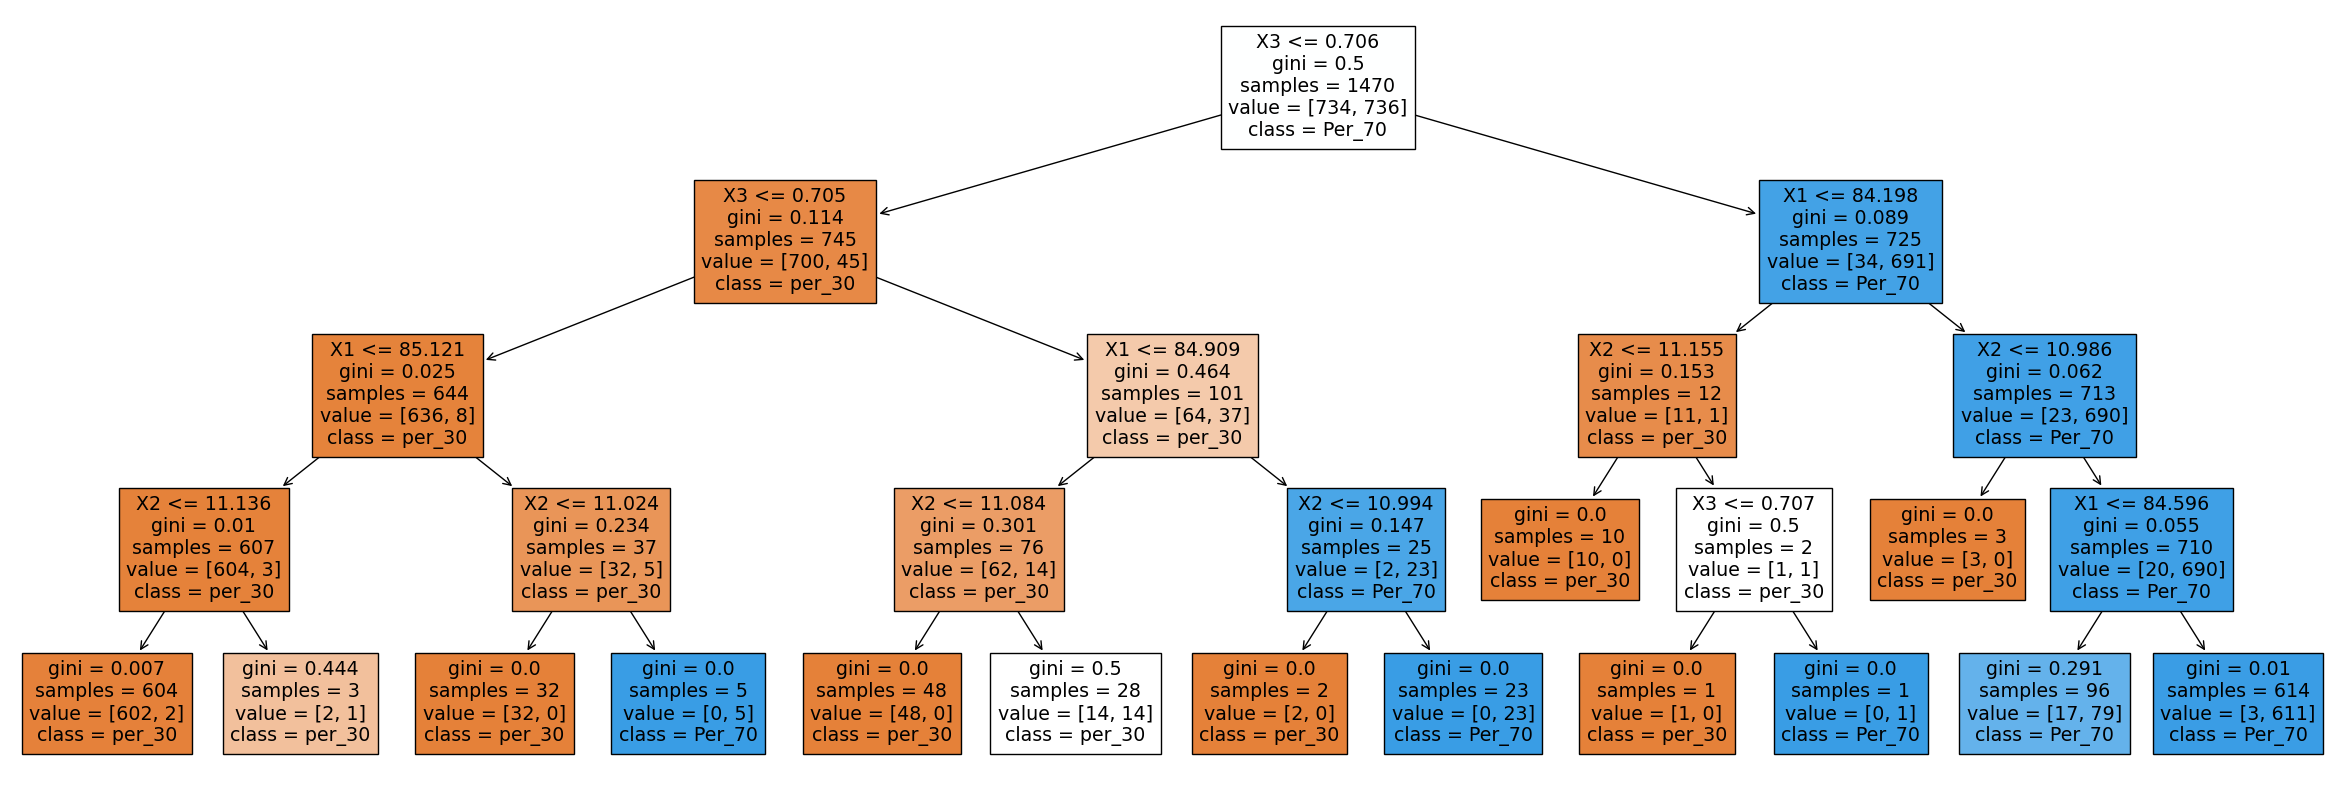

In [48]:
# Creating the tree plot (left = True, Right = False)
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names = ['per_30', 'Per_70'])
plt.rcParams['figure.figsize'] = [30,10]